INFO:util.data_loader:Loading data for weeks: [1] and device types: None and unique_id: None and change_types: [3, 4]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 1 and device Contact Sensor
INFO:util.data_loader:Loading data for week 1 and device Plug
INFO:util.data_loader:Loaded 1281 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 1281 records remaining
INFO:util.data_loader:Filtered data based on change_types: 72 records remaining
INFO:__main__:Loaded 72 records


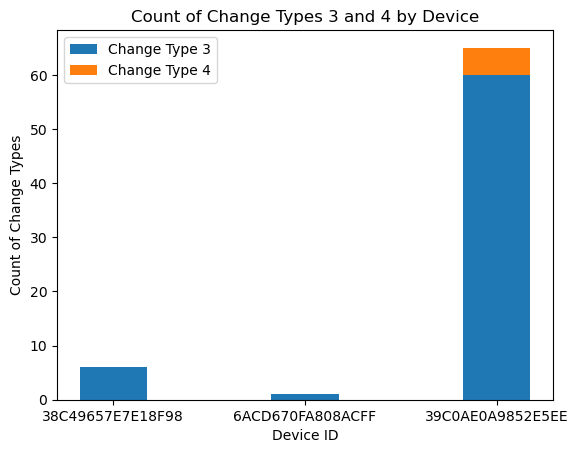

INFO:util.data_loader:Loading data for weeks: [2] and device types: None and unique_id: None and change_types: [3, 4]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 2 and device Contact Sensor
INFO:util.data_loader:Loading data for week 2 and device Plug
INFO:util.data_loader:Loaded 464 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 464 records remaining
INFO:util.data_loader:Filtered data based on change_types: 175 records remaining
INFO:__main__:Loaded 175 records


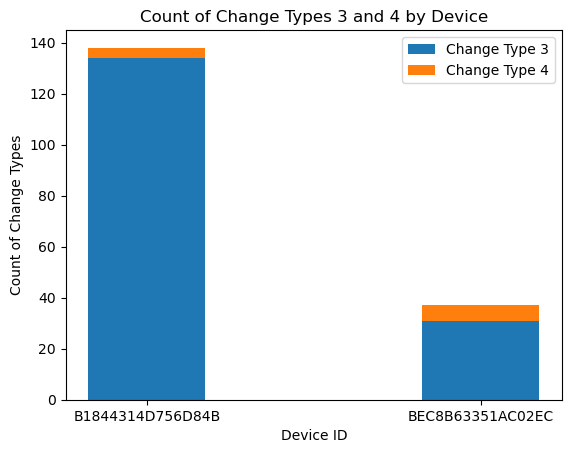

INFO:util.data_loader:Loading data for weeks: [3] and device types: None and unique_id: None and change_types: [3, 4]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 3 and device Contact Sensor
INFO:util.data_loader:Loading data for week 3 and device Plug
INFO:util.data_loader:Loaded 416 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 416 records remaining
INFO:util.data_loader:Filtered data based on change_types: 59 records remaining
INFO:__main__:Loaded 59 records


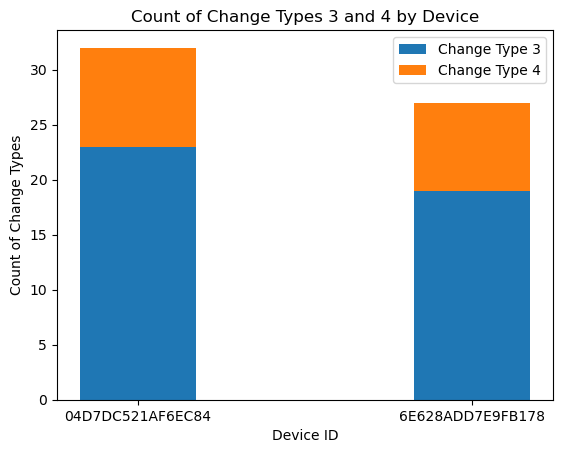

INFO:util.data_loader:Loading data for weeks: [4] and device types: None and unique_id: None and change_types: [3, 4]
INFO:util.data_loader:Loading data for device types: dict_values([0, 1])
INFO:util.data_loader:Loading data for week 4 and device Contact Sensor
INFO:util.data_loader:Loading data for week 4 and device Plug
INFO:util.data_loader:Loaded 616 records from 2 files
INFO:util.data_loader:Filtered data based on unique_id: 616 records remaining
INFO:util.data_loader:Filtered data based on change_types: 208 records remaining
INFO:__main__:Loaded 208 records


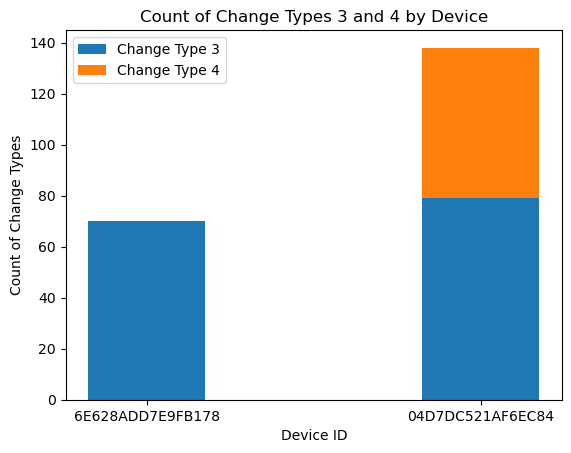

In [5]:
import logging
from util import data_loader
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Some constants
NUM_WEEKS = 4

# Create a mapping dictionary for privacyState values
change_type_mapping = {
    data_loader.ChangeType["DEVICE_EVENT_HUB"]: 'Hub',
    data_loader.ChangeType["DEVICE_EVENT_THIRD_PARTY"]: 'Third-Party',
}

# Create a color mapping dictionary for privacyState values
color_mapping = {
    'Hub': '#3c8eae',
    'Third-Party': '#c77838',
}

# # Sample data
# data = [
#     {
#         "_id": {"$oid": "668439eea51a5edd701047a6"},
#         "uniqueId": "29E2D375B84AE67A",
#         "endpointId": "1",
#         "changeType": 0,
#         "connectionStatus": 0,
#         "booleanState": False,
#         "privacyState": 0,
#         "timestamp": {"$numberLong": "1719941614318"},
#         "__v": 0
#     },
#     {
#         "_id": {"$oid": "668439eea51a5edd701047a7"},
#         "uniqueId": "29E2D375B84AE67A",
#         "endpointId": "1",
#         "changeType": 3,
#         "connectionStatus": 0,
#         "booleanState": False,
#         "privacyState": 1,
#         "timestamp": {"$numberLong": "1719942614318"},
#         "__v": 0
#     },
#     {
#         "_id": {"$oid": "668439eea51a5edd701047a8"},
#         "uniqueId": "29E2D375B84AE67B",
#         "endpointId": "1",
#         "changeType": 4,
#         "connectionStatus": 0,
#         "booleanState": False,
#         "privacyState": 2,
#         "timestamp": {"$numberLong": "1719943614318"},
#         "__v": 0
#     },
#     {
#         "_id": {"$oid": "668439eea51a5edd701047a9"},
#         "uniqueId": "29E2D375B84AE67B",
#         "endpointId": "1",
#         "changeType": 3,
#         "connectionStatus": 0,
#         "booleanState": False,
#         "privacyState": 0,
#         "timestamp": {"$numberLong": "1719944614318"},
#         "__v": 0
#     }
#     # Add more entries...
# ]

change_type_counts = pd.DataFrame()

for week in range(1, NUM_WEEKS + 1):
    data = data_loader.load_data(
        weeks=[week],
        device_types=None,
        unique_id=None,
        change_types=[data_loader.ChangeType["DEVICE_EVENT_HUB"], data_loader.ChangeType["DEVICE_EVENT_THIRD_PARTY"]]
    )
    
    logger.info(f'Loaded {len(data)} records')
    
    device_change_counts = defaultdict(lambda: defaultdict(int))
    
    for entry in data:
        device_id = entry['uniqueId']
        change_type = entry['changeType']
        device_change_counts[device_id][change_type] += 1
    
    # Prepare data for plotting
    device_ids = list(device_change_counts.keys())
    change_type_3_counts = [device_change_counts[device_id][3] for device_id in device_ids]
    change_type_4_counts = [device_change_counts[device_id][4] for device_id in device_ids]
    
    # Plotting
    bar_width = 0.35
    index = list(range(len(device_ids)))
    
    plt.bar(index, change_type_3_counts, bar_width, label='Change Type 3')
    plt.bar(index, change_type_4_counts, bar_width, bottom=change_type_3_counts, label='Change Type 4')
    
    plt.xlabel('Device ID')
    plt.ylabel('Count of Change Types')
    plt.title('Count of Change Types 3 and 4 by Device')
    plt.xticks(index, device_ids)
    plt.legend()
    
    plt.show()
    
    # # Extract privacyState values
    # change_types = [change_type_mapping[item['changeType']] for item in data]
    # 
    # # Count occurrences of each privacyState
    # privacy_state_counts = Counter(change_types)
    # 
    # # Prepare data for pie chart
    # labels = privacy_state_counts.keys()
    # sizes = privacy_state_counts.values()
    # 
    # # Get the corresponding colors for each label
    # colors = [color_mapping[label] for label in labels]
    # 
    # # Create the pie chart
    # plt.figure(figsize=(8, 8))
    # plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 14})
    # # plt.title(f'Distribution of Change Location in Week {week}')
    # plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # # Add a legend
    # plt.legend(loc='lower right', labels=labels, fontsize='12')
    # 
    # plt.savefig(f'output/state_change_location_week_{week}.pdf', format='pdf')
    # plt.show()

